## 1.作业内容
选取一张真彩色图像，用Photoshop"图像"->"模式"菜单中的灰度、索引颜色、RGB颜色分别进行转换，并存储为bitmap文件格式。选用索引颜色时可以将颜色数量设为16，32等，观察图像质量有何变化.  
用skimage.io.imread函数分别读入上述三张图像，打印图像shape属性，观察它们有什么不同。注意：查看skimage技术文档，测试as_gray参数的含义  

阅读matplotlib.pyplot中imshow函数的技术文档，了解cmap的含义及pyplot中内置的颜色表，使用3种内置颜色表显示前面得到的灰度图  像。
利用matplotlib.pyplot的imshow函数显示索引图像每个通道对应的图像。

## 2.具体实现

### 2.1
使用photoshop处理图片。转换灰度即将图片变为灰色显示，改变索引颜色为16，32时则分别将图片只用16或32个颜色显示，放大图片看能看出细节会有失真，质量变差。
转换RGB颜色时图片没有改变。

In [6]:
from skimage import io,data
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 读取图像
imageGrey = io.imread('grey.bmp')
image16 = io.imread('16.bmp')
image32 = io.imread('32.bmp')
imageRGB = io.imread('RGB.bmp')

# 打印图像的 shape
print("Image Grey shape:", imageGrey.shape)
print("Image 16 shape:", image16.shape)
print("Image 32 shape:", image32.shape)
print("Image RGB shape:", imageRGB.shape)


Image Grey shape: (1621, 1135)
Image 16 shape: (1621, 1135, 3)
Image 32 shape: (1621, 1135, 3)
Image RGB shape: (1621, 1135, 3)


### 2.2
如果是彩色图像，shape 会是 (height, width, 3)，表示有3个颜色通道（RGB）。
如果是灰度图像，shape 会是 (height, width)，只有图像的高和宽，没有颜色通道。

### 2.3
查看文档as_gray 参数含义：  
<code>as_gray=False</code>（默认）：彩色图像会保留三个通道 (RGB)  
<code>as_gray=True</code>：图像会被转换为灰度图像，shape 会减少为二维数组，没有颜色通道。

### 2.4
查看matplotlib imshow()方法  
cmap方法用于颜色映射。用于控制图像中不同数值所对应的颜色。可以选择内置的颜色映射，如gray、hot、jet等，也可以自定义颜色映射。


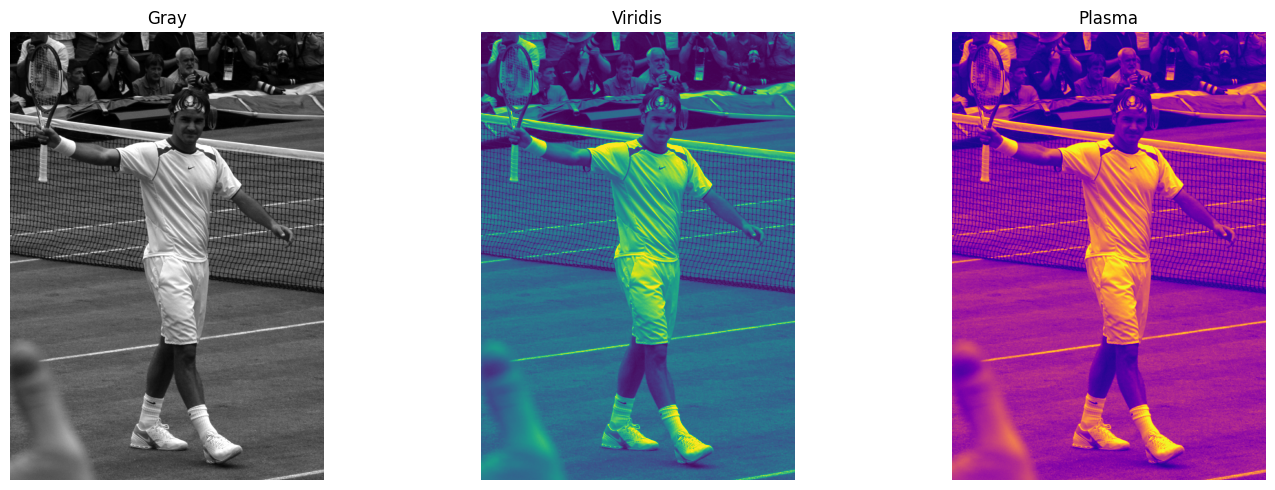

In [8]:
# 读取灰度图像
imageGrey = io.imread('grey.bmp')

# 使用3种不同的颜色映射显示灰度图像
colormaps = ['gray', 'viridis', 'plasma']
titles = ['Gray', 'Viridis', 'Plasma']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, cmap, title in zip(axes, colormaps, titles):
    ax.imshow(imageGrey, cmap=cmap)
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.show()

### 2.5
索引颜色图像（Indexed Image）通常会有多通道（如 RGB 图像）。要显示索引颜色图像的每个通道，分别提取 R、G、B 通道然后显示单通道图片：

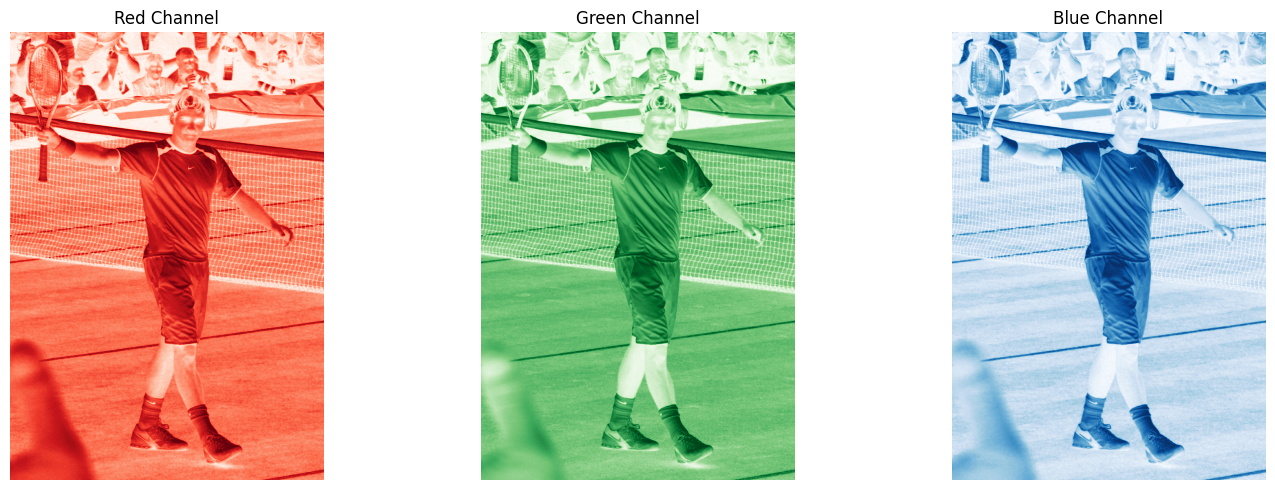

In [9]:
imageRGB = io.imread('RGB.bmp')

R_channel = imageRGB[:, :, 0]  # 红色通道
G_channel = imageRGB[:, :, 1]  # 绿色通道
B_channel = imageRGB[:, :, 2]  # 蓝色通道

# 创建1x3的子图布局
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 显示 R 通道
axes[0].imshow(R_channel, cmap='Reds')
axes[0].axis('off')
axes[0].set_title('Red Channel')

axes[1].imshow(G_channel, cmap='Greens')
axes[1].axis('off')
axes[1].set_title('Green Channel')

axes[2].imshow(B_channel, cmap='Blues')
axes[2].axis('off')
axes[2].set_title('Blue Channel')

plt.tight_layout()
plt.show()